Hanya menggunakan statsmodel 

belum melakukan train test split

hanya build dengan variable numerical

# **Saudi Arabia Used Car**

### **BACKGROUND**

**Used Car Dataset** is a dataset that discusses **what cars are used in the region of Saudi Arabia**. So here, I used the Dataset to **Build Price Prediction** and create EDA. The Limitation of this Prediction such as **Only use Statsmodel, didn't performed the train-test split, only use numerical variable**

### **A. IMPORT LIBRARY**

In [1]:
# Import Library

import statsmodels.api as sm
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np


Importing Library that are going to use for Building the Prediction and EDA 

### **B. IMPORT DATASET**

In [2]:
# Import Dataset

df = pd.read_csv('UsedCarsSA_Clean_EN.csv')
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000,False
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000,False
8032,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,0,True
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False


### **C. DATA WRANGLING**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8035 non-null   object 
 1   Type         8035 non-null   object 
 2   Year         8035 non-null   int64  
 3   Origin       8035 non-null   object 
 4   Color        8035 non-null   object 
 5   Options      8035 non-null   object 
 6   Engine_Size  8035 non-null   float64
 7   Fuel_Type    8035 non-null   object 
 8   Gear_Type    8035 non-null   object 
 9   Mileage      8035 non-null   int64  
 10  Region       8035 non-null   object 
 11  Price        8035 non-null   int64  
 12  Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 761.3+ KB


Checking the total column, missing value, and Datatype

In [4]:
list = []
for i in df.columns:
    list.append([i, df[i].nunique()])

pd.DataFrame(list, columns = ['Nama Columns', 'Jumlah Unique'])

,Nama Columns,Jumlah Unique
0,Make,59
1,Type,381
2,Year,52
3,Origin,4
4,Color,15
5,Options,3
6,Engine_Size,75
7,Fuel_Type,3
8,Gear_Type,2
9,Mileage,2175


Count the unique Value for each columns

In [5]:
list = []
for i in df.columns:
    list.append([i, df[i].unique()])

pd.DataFrame(list, columns = ['Nama Columns', 'Jumlah Unique'])

,Nama Columns,Jumlah Unique
0,Make,"[Chrysler, Nissan, Hyundai, Honda, Toyota, GMC..."
1,Type,"[C300, Patrol, Sunny, Elantra, Accord, Land Cr..."
2,Year,"[2018, 2016, 2019, 2011, 2009, 2017, 2014, 202..."
3,Origin,"[Saudi, Gulf Arabic, Other, Unknown]"
4,Color,"[Black, White, Silver, Grey, Navy, Bronze, Red..."
5,Options,"[Full, Standard, Semi Full]"
6,Engine_Size,"[5.7, 4.8, 1.5, 1.6, 2.0, 4.5, 3.6, 2.5, 5.6, ..."
7,Fuel_Type,"[Gas, Diesel, Hybrid]"
8,Gear_Type,"[Automatic, Manual]"
9,Mileage,"[103000, 5448, 72418, 114154, 41912, 39000, 18..."


listing the unique value for each columns

In [7]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,8035.000000,8035.000000,8.035000e+03,8.035000e+03
mean,2014.097698,3.287729,1.491488e+05,5.369984e+04
std,5.757228,1.517747,3.474480e+05,7.198472e+04
min,1963.000000,1.000000,1.000000e+02,0.000000e+00
25%,2012.000000,2.000000,3.700000e+04,0.000000e+00
50%,2016.000000,3.000000,1.019600e+05,3.700000e+04
75%,2018.000000,4.400000,1.950000e+05,7.375000e+04
max,2022.000000,9.000000,2.000000e+07,1.150000e+06


Describe Statistic to check the outliers

In [8]:
df_numeric = df[['Price', 'Mileage']]

In [9]:
lower = df["Price"].quantile(0.01) 
upper  = df["Price"].quantile(0.99)

df = df[(df["Price"] < upper) & (df["Price"] > lower)]

Filter out the extreme outliers for data Price

In [10]:
lower = df["Mileage"].quantile(0.01) 
upper  = df["Mileage"].quantile(0.99)

df = df[(df["Mileage"] < upper) & (df["Mileage"] > lower)]

Filter out extreme outliers for data Milelage

In [11]:
df.describe(percentiles = [0.25, 0.5, 0.75, 0.95, 0.99])

,Year,Engine_Size,Mileage,Price
count,5316.000000,5316.000000,5316.000000,5316.000000
mean,2014.868698,3.155963,125584.016178,73028.260910
std,5.031946,1.452437,102701.546404,56269.338539
min,1963.000000,1.000000,122.000000,1.000000
25%,2013.000000,2.000000,50000.000000,35000.000000
50%,2016.000000,2.700000,102000.000000,58000.000000
75%,2018.000000,4.000000,180000.000000,90000.000000
95%,2020.000000,5.700000,334650.000000,186500.000000
99%,2021.000000,6.400000,441700.000000,280000.000000
max,2021.000000,9.000000,533399.000000,335000.000000


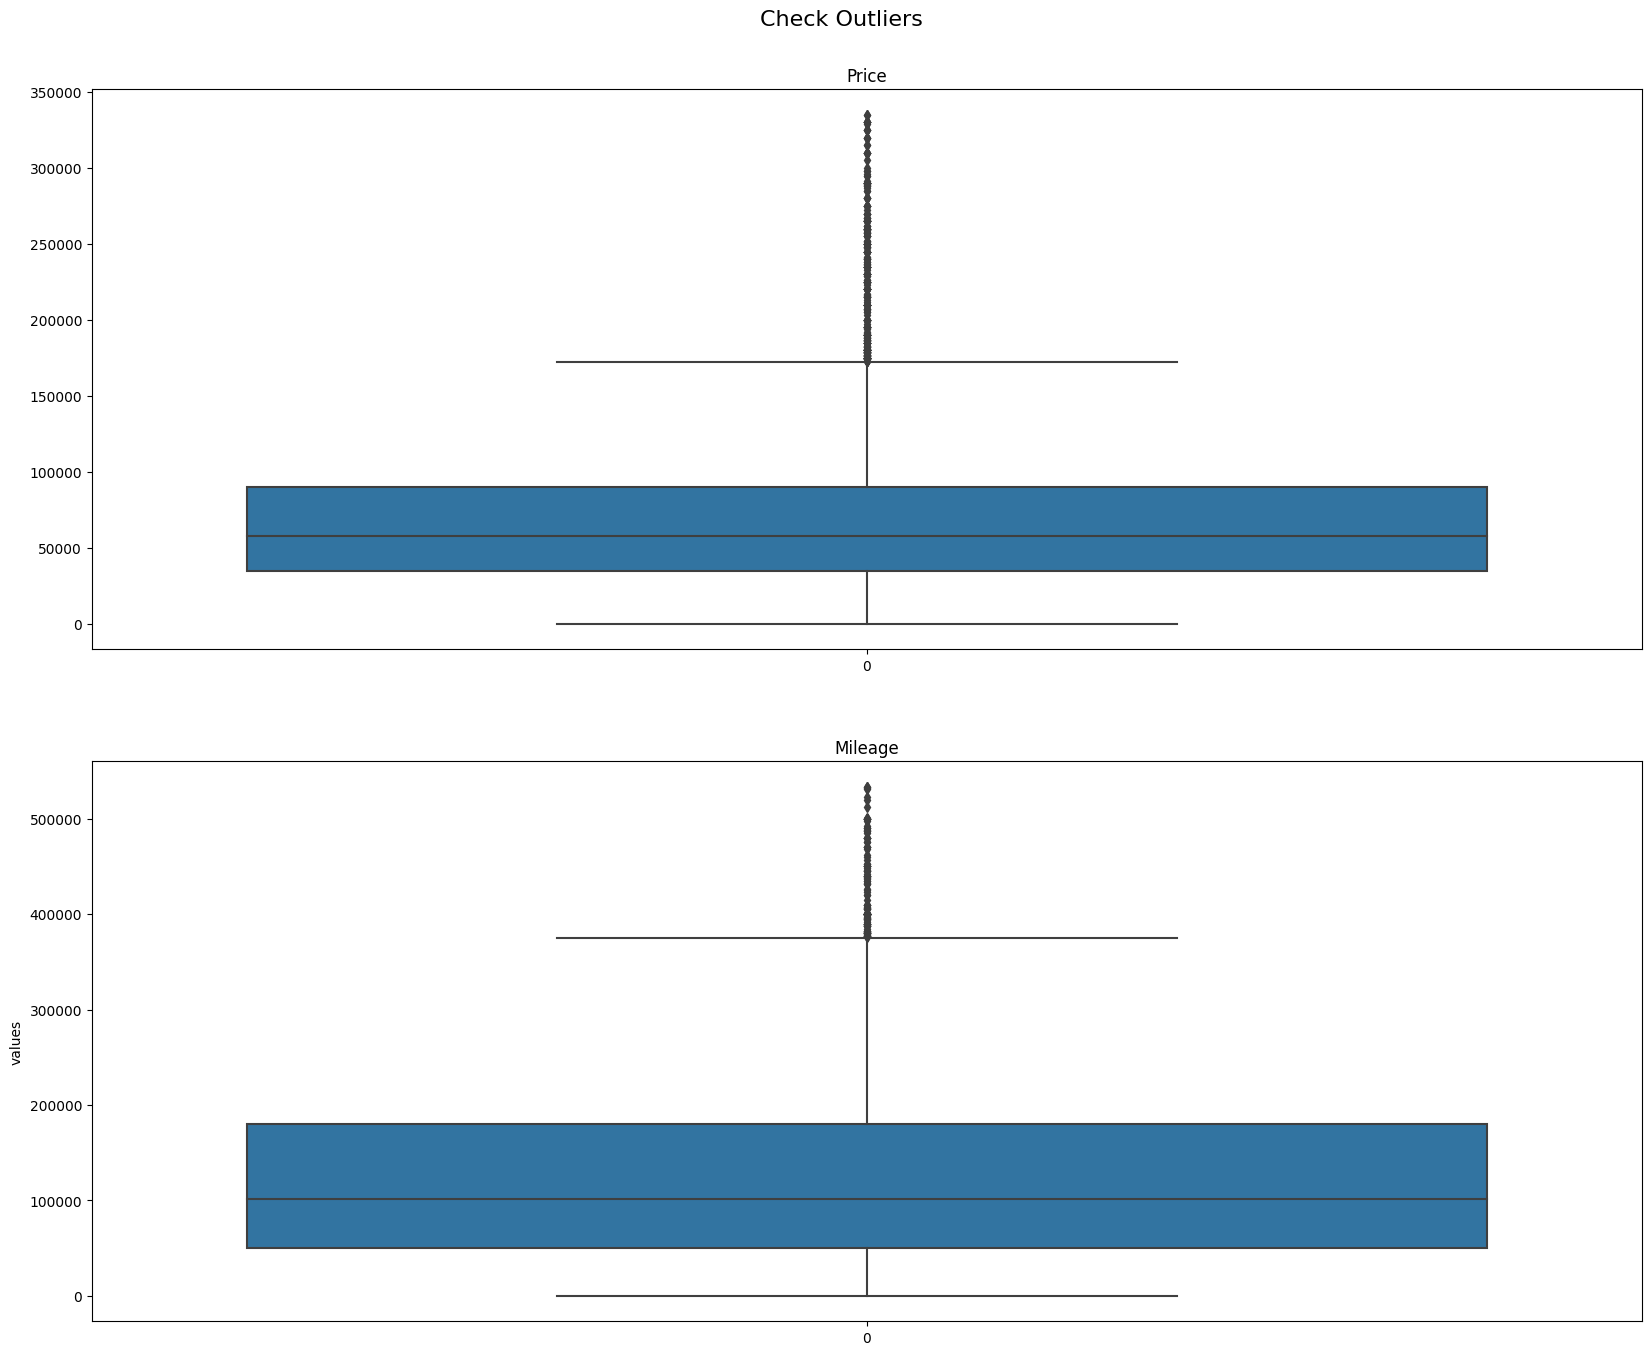

In [11]:
def boxplot_custom(dataset, columns_list, cols, suptitle, size = (20, 16)) :
    fig, axs = plt.subplots(cols, figsize = size)
    fig.suptitle(suptitle, y = 0.93, size = 16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[1].set_ylabel('values')
        sns.boxplot(data = dataset[data], orient = 'v', ax = axs[i])
        axs[i].set_title(data)
boxplot_custom(dataset = df, columns_list = df_numeric,cols = 2, suptitle = 'Check Outliers')


The outliers for Price and Mileage both of them are Right Skewd (Not Normal)

In [26]:
df['Negotiable Cars'] = df['Negotiable'].apply(lambda x: 'Not Negotiable' if x == 0 else 'Negotiable')
df


,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable,Options_Fuel_Gear,Negotiable Cars
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False,"Full, Gas, Automatic",Not Negotiable
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False,"Standard, Gas, Automatic",Not Negotiable
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False,"Standard, Gas, Automatic",Not Negotiable
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False,"Semi Full, Gas, Automatic",Not Negotiable
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000,False,"Full, Gas, Automatic",Not Negotiable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8029,Kia,Sorento,2006,Saudi,Navy,Full,3.5,Gas,Manual,257000,Dammam,15000,False,"Full, Gas, Manual",Not Negotiable
8030,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000,False,"Full, Gas, Automatic",Not Negotiable
8031,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000,False,"Full, Gas, Automatic",Not Negotiable
8033,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False,"Full, Gas, Automatic",Not Negotiable


Adding column "Negotiable Cars" to define if the cars are negotiable or not

**Summary**
- This Dataset has 13 Columns with total row 8035, there is no missing value found in this dataset
- Checking the unique data count for each column & listing out the unique values
- Filter out the extreme outliers for column Price and Mileage
- The outliers for Price and Mileage are right skewd (not normal distributed)
- Add Columns Negotiable Cars to define the cars are Negotiable or Not

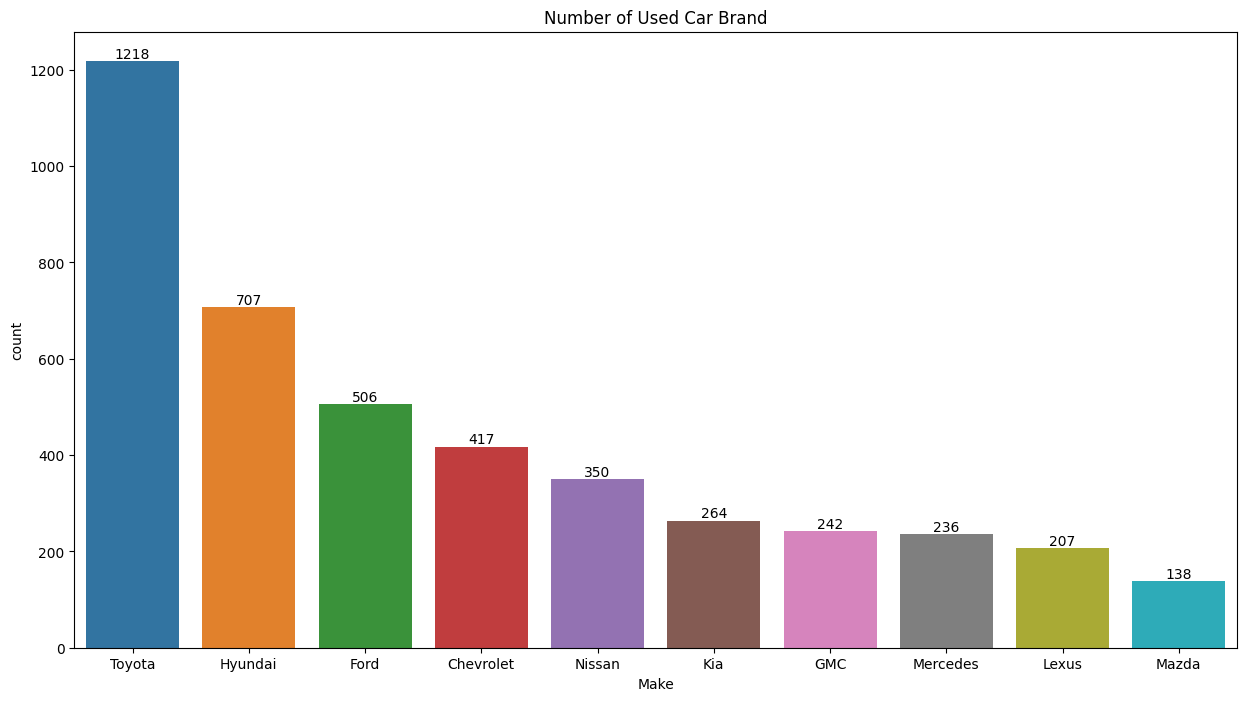

In [12]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x='Make', data=df, order=df['Make'].value_counts().head(10).index)
abs_values = df['Make'].value_counts(ascending=False).head(10).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title('Number of Used Car Brand')

plt.show()

Checking the numbers of used car brand in Saudi Arabia

Finding = **Most used car brand** in Saudi Arabia is **Toyota** with the total value **1218 Cars**

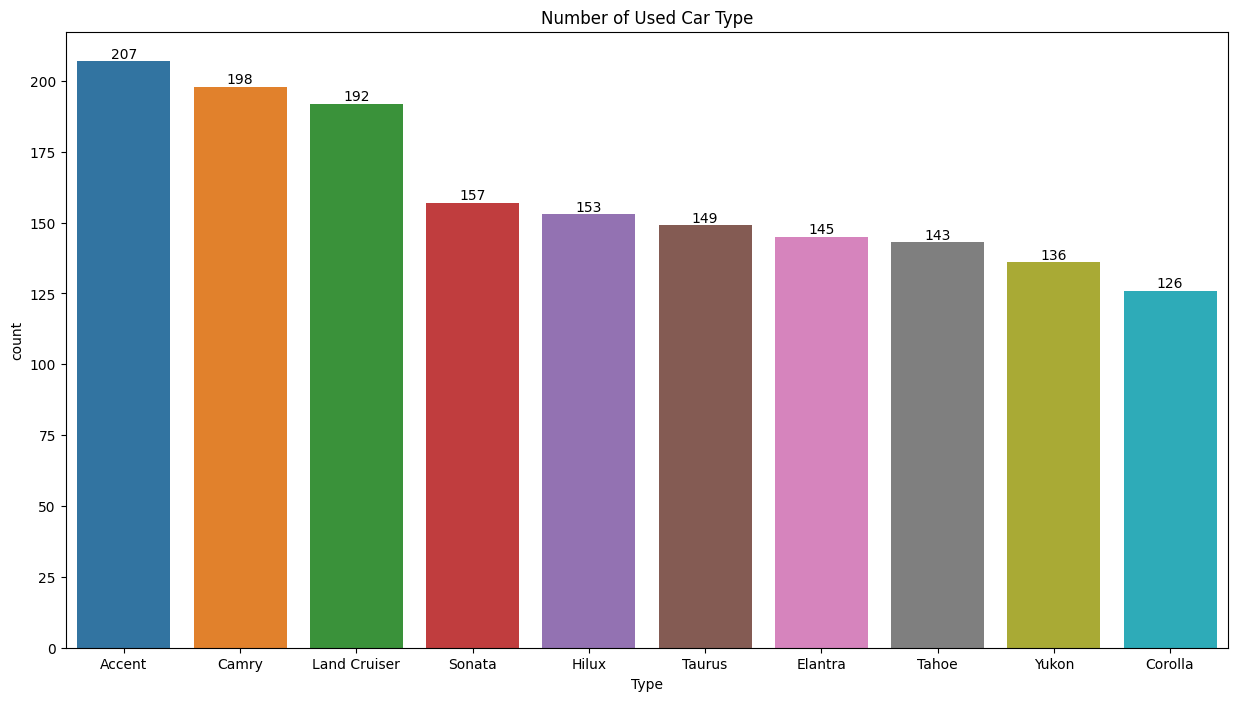

In [13]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x='Type', data=df, order=df['Type'].value_counts().head(10).index)
abs_values = df['Type'].value_counts(ascending=False).head(10).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title('Number of Used Car Type')

plt.show()

Checking the numbers of used Car Type in Saudi Arabia

Finding = The **most used Car Type** in Saudi Arabia is **Accent, Camry, and Land Cruiser**

In [14]:
car_type = df[(df['Type'] == "Accent") | (df['Type'] == "Camry") | (df['Type'] == "Land Cruiser")]
car_type

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
6,Toyota,Land Cruiser,2011,Saudi,White,Semi Full,4.5,Gas,Automatic,183000,Riyadh,92000,False
10,Toyota,Camry,2017,Gulf Arabic,White,Standard,2.5,Gas,Automatic,107000,Dammam,50000,False
39,Toyota,Camry,2020,Saudi,Silver,Standard,2.5,Hybrid,Automatic,46000,Riyadh,75000,False
41,Toyota,Land Cruiser,1993,Saudi,Bronze,Semi Full,4.6,Gas,Manual,400,Tabouk,12000,False
50,Hyundai,Accent,2020,Saudi,Another Color,Standard,1.4,Gas,Automatic,2000,Riyadh,42000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8005,Hyundai,Accent,2017,Saudi,White,Standard,1.4,Gas,Automatic,53000,Dammam,35000,False
8006,Hyundai,Accent,2017,Saudi,White,Standard,1.6,Gas,Automatic,112000,Dammam,32000,False
8007,Hyundai,Accent,2017,Saudi,White,Standard,1.6,Gas,Automatic,109000,Dammam,33000,False
8008,Hyundai,Accent,2017,Saudi,White,Standard,1.4,Gas,Automatic,61000,Dammam,34000,False


Checking the Company that build the Car Type

In [15]:
df_group = df.groupby('Make')['Type'].unique()
df_group

Make
Aston Martin                                                [DB9]
Audi                     [A6, Q5, S5, A8, A3, S8, A5, A7, Q7, A4]
BMW              [The 7, The 4, The 5, X, The 6, The 3, The M, Z]
BYD                                                          [F3]
Bentley                                             [Flying Spur]
Cadillac        [CT-S, XT5, Escalade, Fleetwood, ATS, CT6, CT4...
Changan          [Seven, Eado, CS35, CS75, CS35 Plus, CS85, CS95]
Chery                                                     [Tiggo]
Chevrolet       [Impala, Tahoe, Malibu, Suburban, Caprice, Cam...
Chrysler                             [C300, 300, S300, C200, SRT]
Classic                                             [Mini Cooper]
Daihatsu                 [Gran Max, Terios Ground, Delta, Terios]
Dodge                  [Charger, Challenger, Durango, Ram, Nitro]
FAW                                               [T77, B50, X40]
Ferrari                                         [GTB 599 Fiorano]
Fiat 

Listing out the car type based on the Car Company

In [16]:
df_group = df.groupby('Make')['Type'].value_counts().sort_values(ascending = False).head(10)
df_group

Make       Type        
Hyundai    Accent          207
Toyota     Camry           198
           Land Cruiser    192
Hyundai    Sonata          157
Toyota     Hilux           153
Ford       Taurus          149
Hyundai    Elantra         145
Chevrolet  Tahoe           143
GMC        Yukon           136
Toyota     Corolla         126
Name: count, dtype: int64

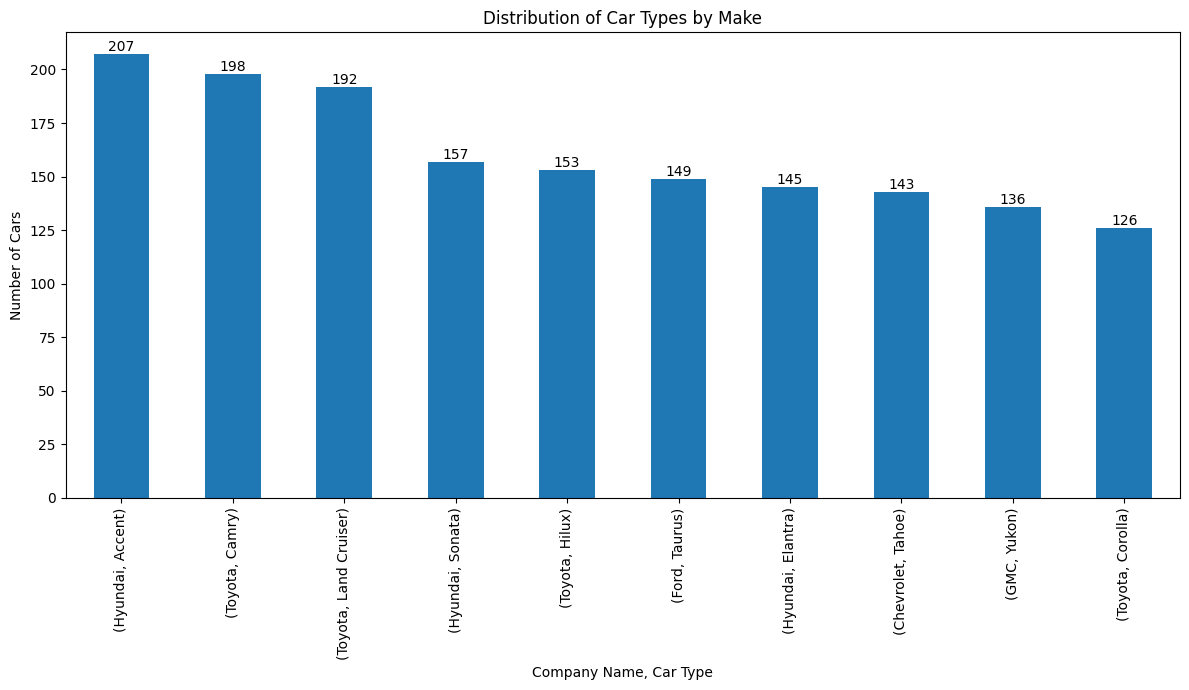

In [17]:
df_group.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.xlabel('Company Name, Car Type')
plt.ylabel('Number of Cars')
plt.title('Distribution of Car Types by Make')
plt.xticks(rotation=90)
plt.tight_layout()
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge')

plt.show()

The car type based on the car company

Finding = The most used car type in Saudi Arabia are **Accent produced by Hyundai, Camry produced by Toyata, and Land Cruiser produced by Toyota**

In [18]:
df_color = df['Color'].value_counts()
df_color

Color
White            2235
Silver            641
Black             614
Grey              526
Another Color     340
Brown             217
Red               186
Blue              157
Golden            117
Navy              113
Bronze            101
Oily               33
Green              20
Orange              8
Yellow              8
Name: count, dtype: int64

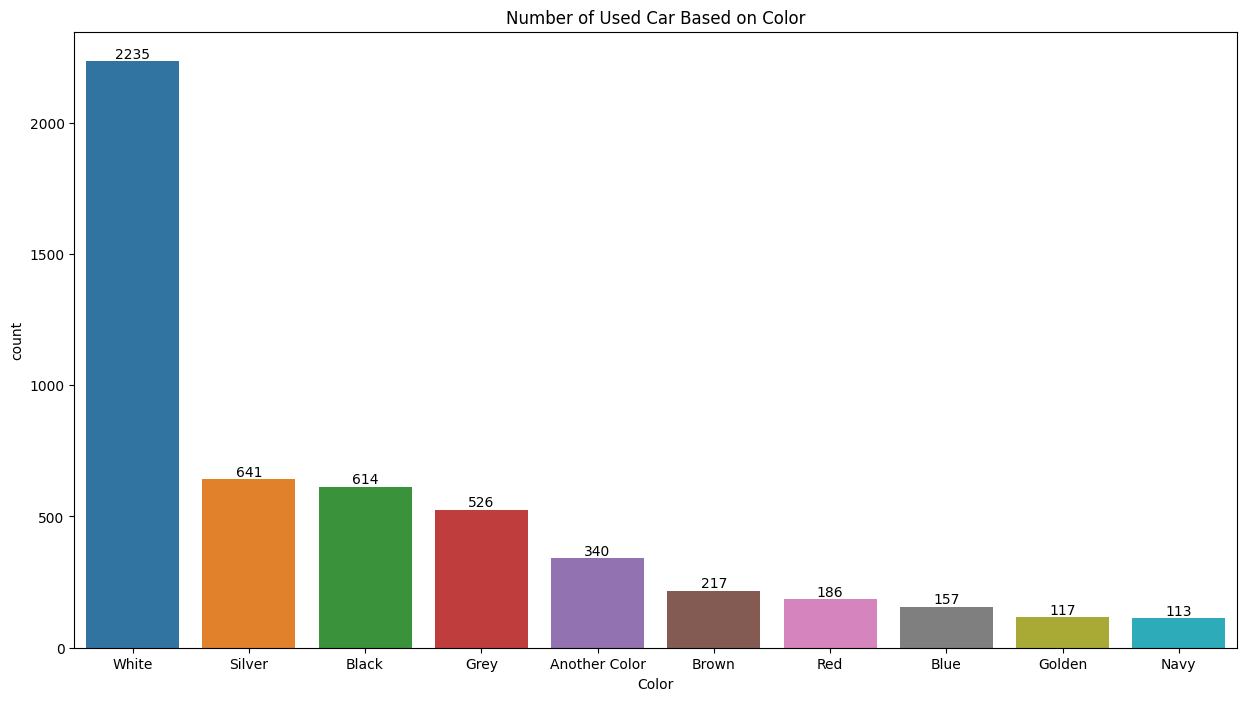

In [19]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x='Color', data=df, order=df['Color'].value_counts().head(10).index)
abs_values = df['Color'].value_counts(ascending=False).head(10).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title('Number of Used Car Based on Color')

plt.show()

Most used car based on the color

Finding = The **most used Car based on the color** is **White** with the total **2235** Cars

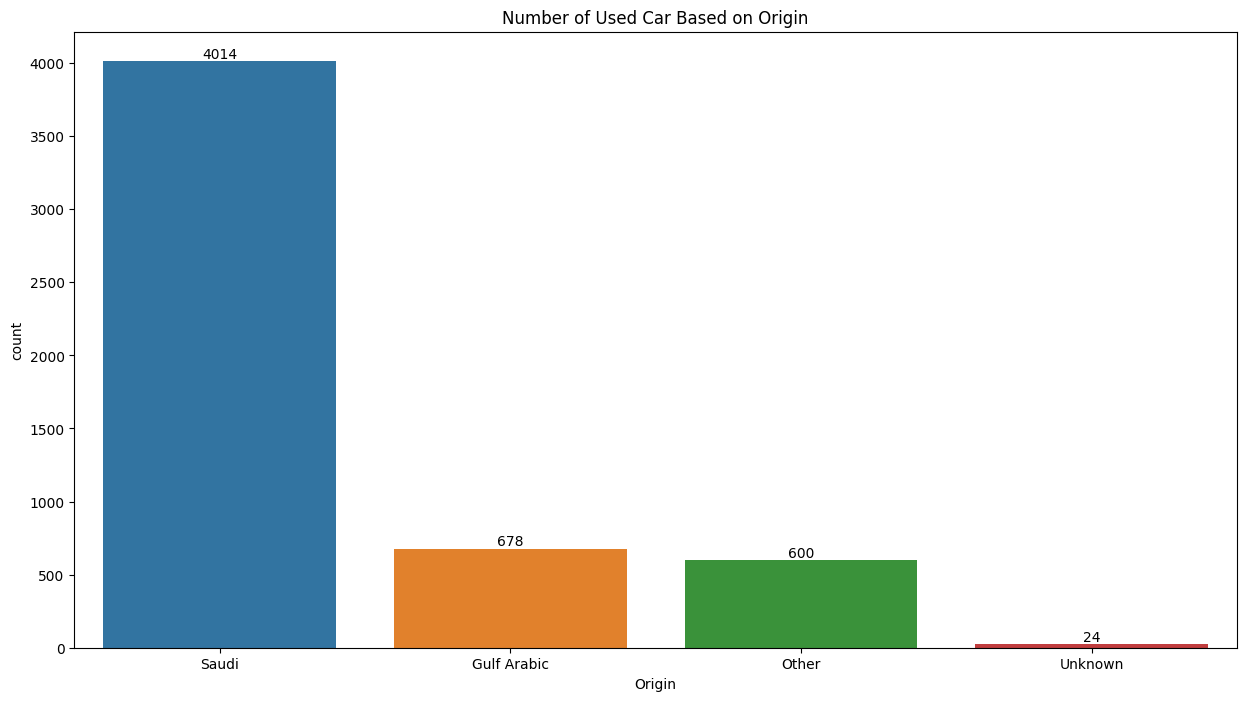

In [20]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x='Origin', data=df, order=df['Origin'].value_counts().head(10).index)
abs_values = df['Origin'].value_counts(ascending=False).head(10).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title('Number of Used Car Based on Origin')

plt.show()

Number of used car based on Origin 

Finding = The **most used car based on the Origin** is **Saudi** with total **4014** Cars

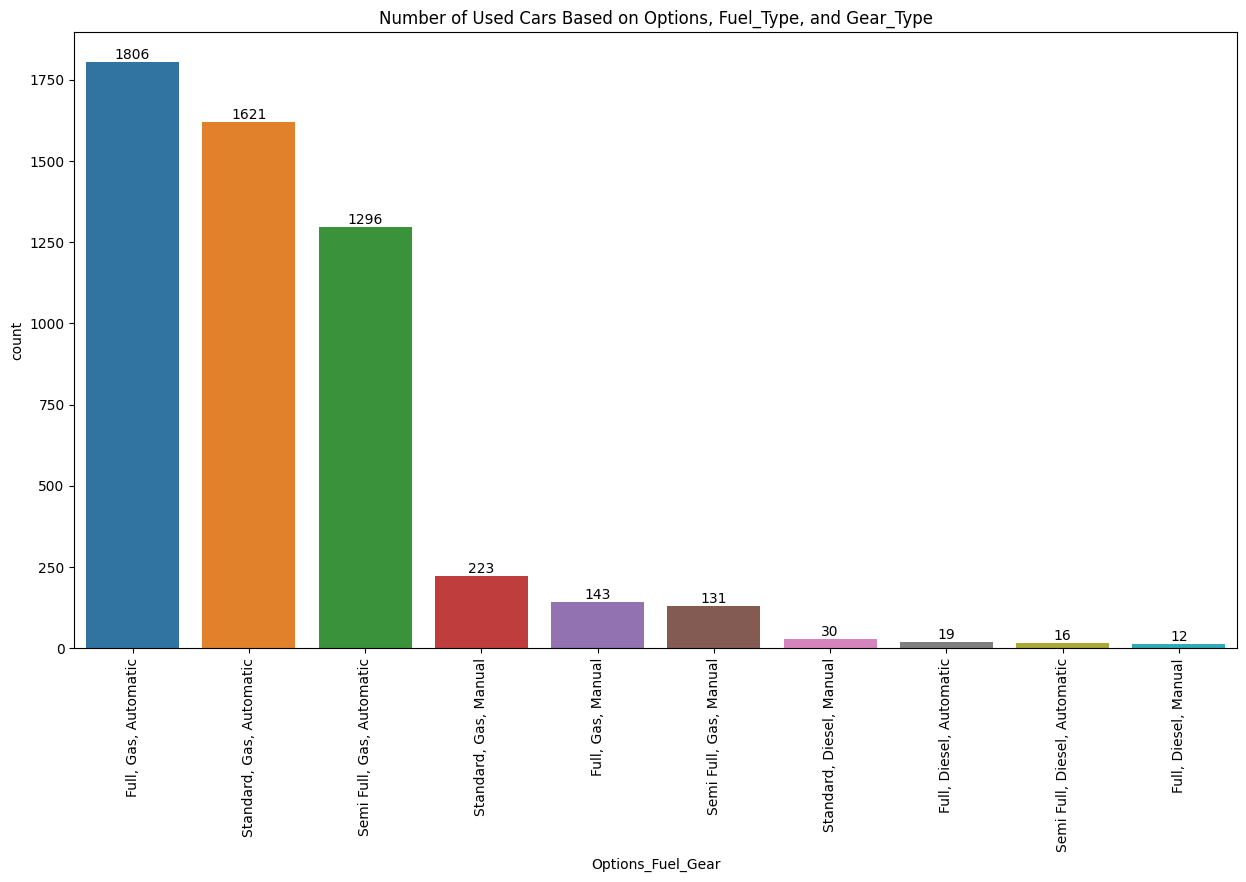

In [22]:
df['Options_Fuel_Gear'] = df['Options'] + ', ' + df['Fuel_Type'] + ', ' + df['Gear_Type']

plt.figure(figsize=(15, 8))
ax = sns.countplot(x='Options_Fuel_Gear', data=df, order=df['Options_Fuel_Gear'].value_counts().head(10).index)
abs_values = df['Options_Fuel_Gear'].value_counts(ascending=False).head(10).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title('Number of Used Cars Based on Options, Fuel_Type, and Gear_Type')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.show()

Most used cars based on Option, Fuel Type, and Gear Type

Finding = The most used car in Saudi Arabia is Cars with F**ull Option, the car the fuel type using Gas, and Automatic Gear type** with total **1806** Cars

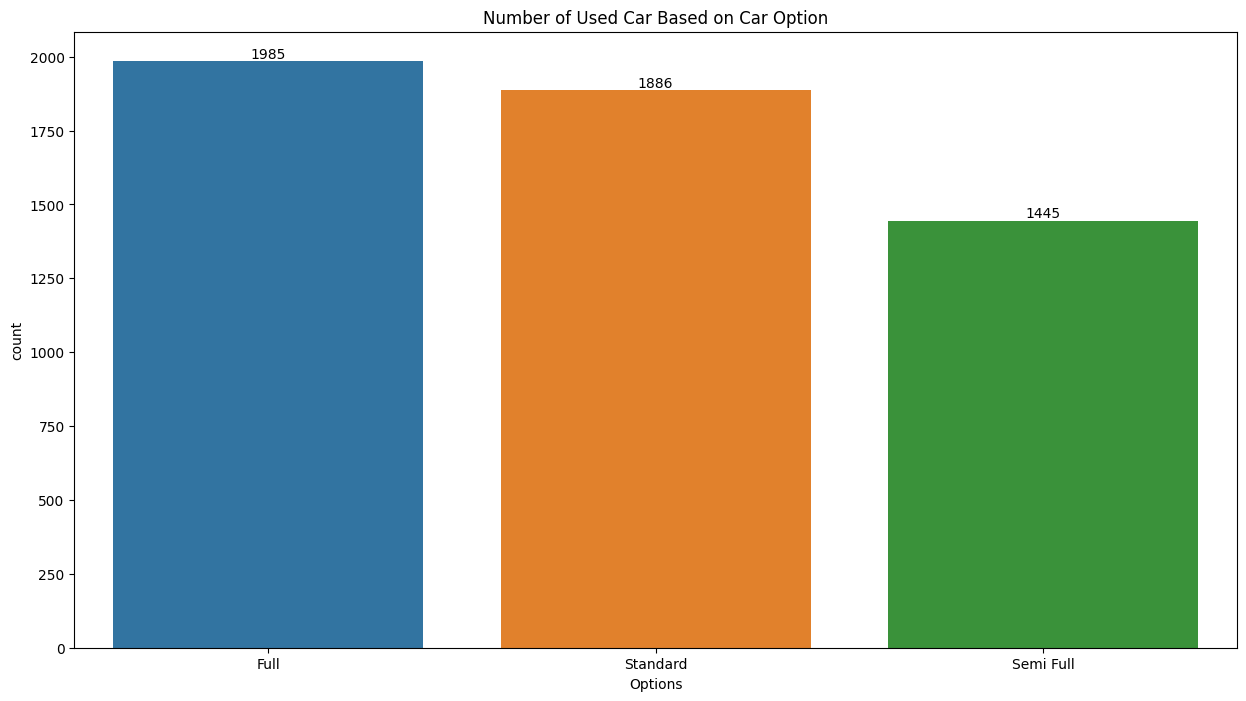

In [23]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x='Options', data=df, order=df['Options'].value_counts().head(10).index)
abs_values = df['Options'].value_counts(ascending=False).head(10).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title('Number of Used Car Based on Car Option')

plt.show()

Most Used car based on the Options

Findings = Based on the findings **most of used options car** in saudi arabia is Full with a total **1985** cars 

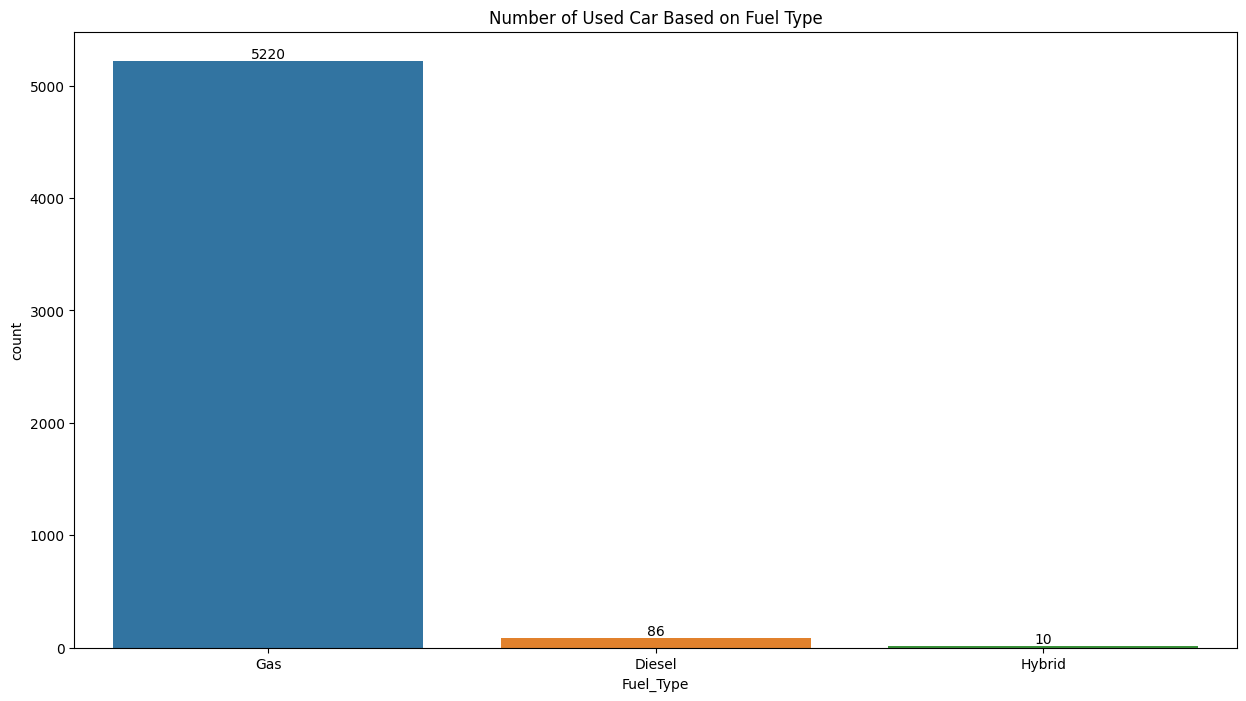

In [24]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x='Fuel_Type', data=df, order=df['Fuel_Type'].value_counts().head(10).index)
abs_values = df['Fuel_Type'].value_counts(ascending=False).head(10).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title('Number of Used Car Based on Fuel Type')

plt.show()

Most used cars based on the Fuel Type

Findings = Most of used cars in Saudi Arabia **still using Gas** as the Fuel Type with a total **5220** cars are using Gas as the Fuel Type

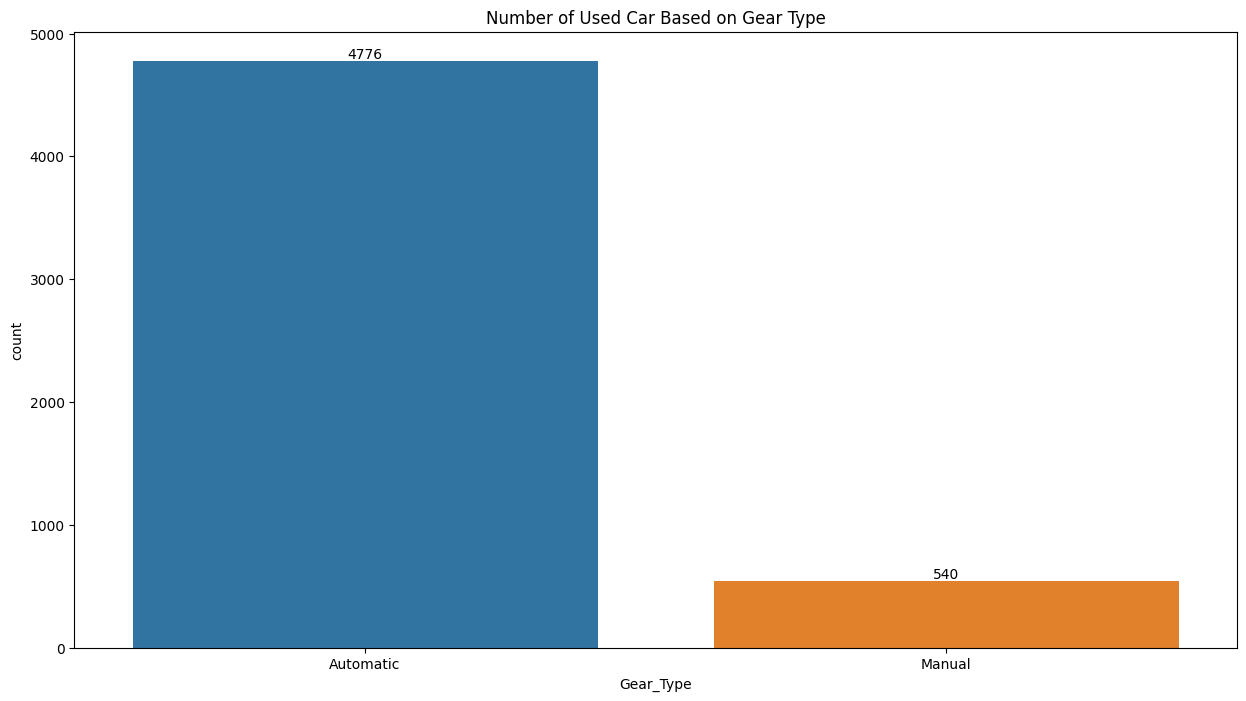

In [25]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x='Gear_Type', data=df, order=df['Gear_Type'].value_counts().head(10).index)
abs_values = df['Gear_Type'].value_counts(ascending=False).head(10).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title('Number of Used Car Based on Gear Type')

plt.show()

Most used Car based on the Gear Type

Findings = There are **4776 automatic** cars that been used in Saudi Arabia 

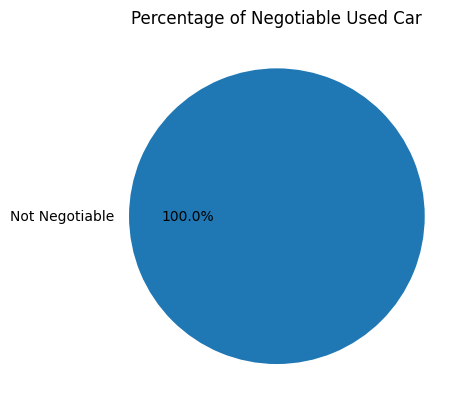

In [27]:
plt.subplot(1,1,1)
nego = df['Negotiable Cars'].value_counts()
plt.pie(nego, labels=nego.index, autopct='%1.1f%%')
plt.title('Percentage of Negotiable Used Car')

plt.show()

Car Negotiable Percentage 

Findings = Based on the finding, **All of the used cars** in Saudi Arabia are **not negotiable**

<function matplotlib.pyplot.show(close=None, block=None)>

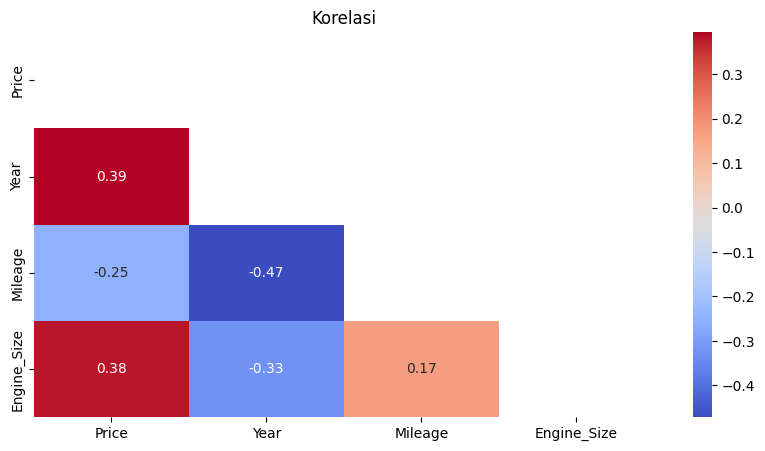

In [28]:
plt.figure(figsize = (10,5))
data_corr = df[['Price','Year', 'Mileage', 'Engine_Size']].corr('spearman')
matrix = np.triu(data_corr)
sns.heatmap(
    data_corr,
    annot = True,
    cmap = 'coolwarm',
    mask = matrix
)

plt.title('Korelasi')

plt.show

The Correlation

Findings = Based on checking the correlation between **Price, Year, Mileage, and Engine Size** are not really related (small correlation)

**Make The DF Prediction**

In [29]:
price_pred = df[['Year', 'Engine_Size', 'Mileage', 'Price']]
price_pred

,Year,Engine_Size,Mileage,Price
0,2018,5.7,103000,114000
2,2019,1.5,72418,27500
3,2019,1.6,114154,43000
4,2019,2.0,41912,59500
5,2018,1.5,39000,72000
...,...,...,...,...
8029,2006,3.5,257000,15000
8030,2015,3.0,77000,75000
8031,2010,3.6,150000,53000
8033,2011,2.5,18500,22000


**Create The Regression Model**

In [30]:
reg_model = sm.OLS(price_pred['Price'], sm.add_constant(df[['Engine_Size', 'Mileage', 'Year']]))
hasil = reg_model.fit()
print(hasil.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     827.9
Date:                Mon, 18 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:07:30   Log-Likelihood:                -64669.
No. Observations:                5316   AIC:                         1.293e+05
Df Residuals:                    5312   BIC:                         1.294e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.932e+06   2.83e+05    -27.997      

**Prediction**

In [31]:
def model(x1, x2, x3) :
    Y = -8.543e06 + (1.13e04*x1) + (-0.0087*x2) + (4250.3501 *x3)
    return Y

print(model(1.5, 100, 2022))

68157.03219999932
